<a href="https://colab.research.google.com/github/19bcs4019Deepak/Capstone-Project/blob/main/Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Model-EDA and Linear Regression**

In [14]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT DATASETS/coffee.csv")
df=pd.DataFrame(dataset)
df
 

,Date,Open,High,Low,Close,Volume,Currency
0,03/01/2000,122.25,124.00,116.10,116.50,6640.0,USD
1,04/01/2000,116.25,120.50,115.75,116.25,5492.0,USD
2,05/01/2000,115.00,121.00,115.00,118.60,6165.0,USD
3,06/01/2000,119.00,121.40,116.50,116.85,5094.0,USD
4,07/01/2000,117.25,117.75,113.80,114.15,6855.0,USD
...,...,...,...,...,...,...,...
5697,27/06/2022,223.45,226.00,220.10,222.10,15596.0,USD
5698,28/06/2022,223.45,224.35,217.10,217.75,16942.0,USD
5699,29/06/2022,218.00,230.20,217.55,228.25,26697.0,USD
5700,30/06/2022,227.85,231.65,227.85,230.10,14051.0,USD


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
rcParams['figure.figsize'] = 10,8

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,03/01/2000,122.25,124.00,116.10,116.50,6640.0,USD
1,04/01/2000,116.25,120.50,115.75,116.25,5492.0,USD
2,05/01/2000,115.00,121.00,115.00,118.60,6165.0,USD
3,06/01/2000,119.00,121.40,116.50,116.85,5094.0,USD
4,07/01/2000,117.25,117.75,113.80,114.15,6855.0,USD


In [17]:
df.shape

(5702, 7)

In [18]:
def generate_report(data):
    print(data.info())
    print(data.describe())

In [19]:
df.isna().sum()

Date        1
Open        1
High        1
Low         1
Close       1
Volume      1
Currency    1
dtype: int64

In [20]:
generate_report(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5701 non-null   object 
 1   Open      5701 non-null   float64
 2   High      5701 non-null   float64
 3   Low       5701 non-null   float64
 4   Close     5701 non-null   float64
 5   Volume    5701 non-null   float64
 6   Currency  5701 non-null   object 
dtypes: float64(5), object(2)
memory usage: 312.0+ KB
None
              Open         High          Low        Close        Volume
count  5701.000000  5701.000000  5701.000000  5701.000000   5701.000000
mean    126.530928   128.100002   125.061647   126.477781   8797.348535
std      50.072685    50.659995    49.365765    50.006451   9613.131280
min      41.500000    42.000000    41.500000    41.500000      0.000000
25%      98.550000    99.750000    97.500000    98.450000     62.000000
50%     120.000000   121.300000   118.700000   119.9

In [21]:
df.isnull().sum().sort_values(ascending=False)

Date        1
Open        1
High        1
Low         1
Close       1
Volume      1
Currency    1
dtype: int64

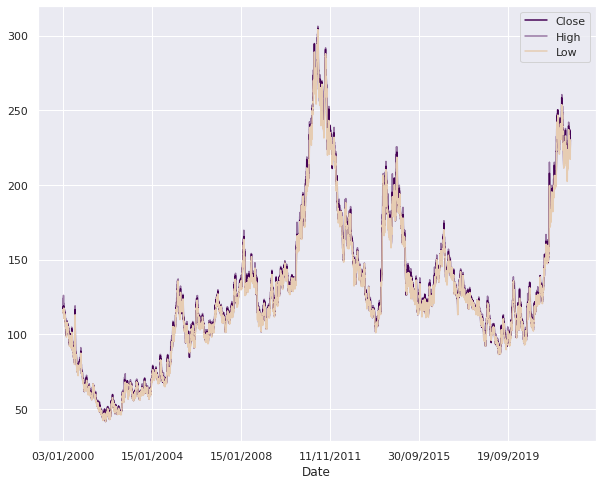

In [22]:
ax = plt.gca()
df.plot(x="Date", y="Close",cmap="viridis", ax = ax)
df.plot(x="Date", y="High",cmap="viridis", ax = ax, alpha=0.5)
df.plot(x="Date", y="Low", color="#e6ccb2", ax=ax)

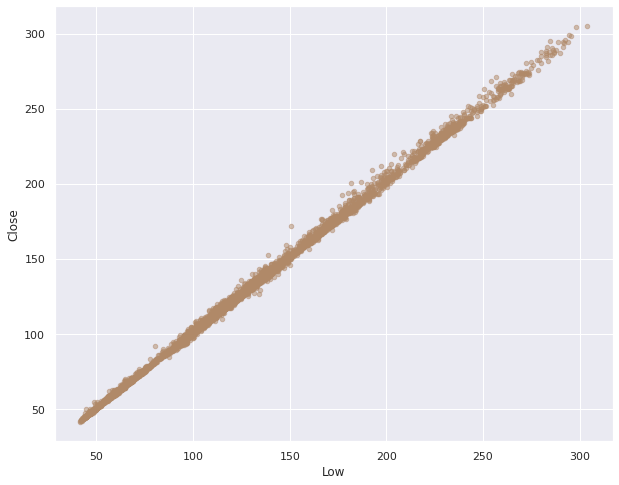

In [23]:
df.plot(x="Low", y="Close", kind="scatter", color="#b08968", alpha=0.5)

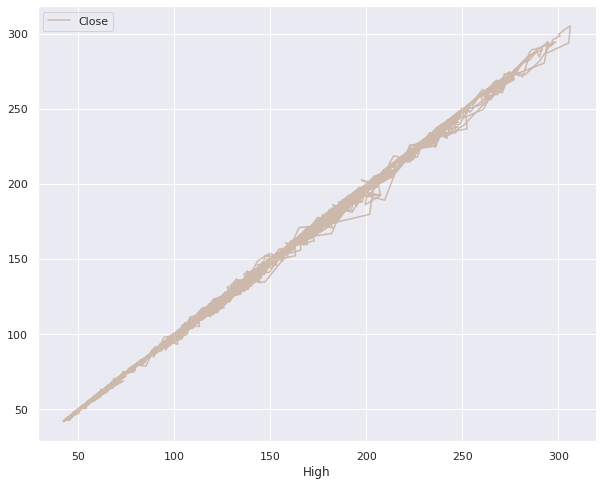

In [24]:
df.plot(x="High", y="Close", color="#b08968", alpha=0.5)

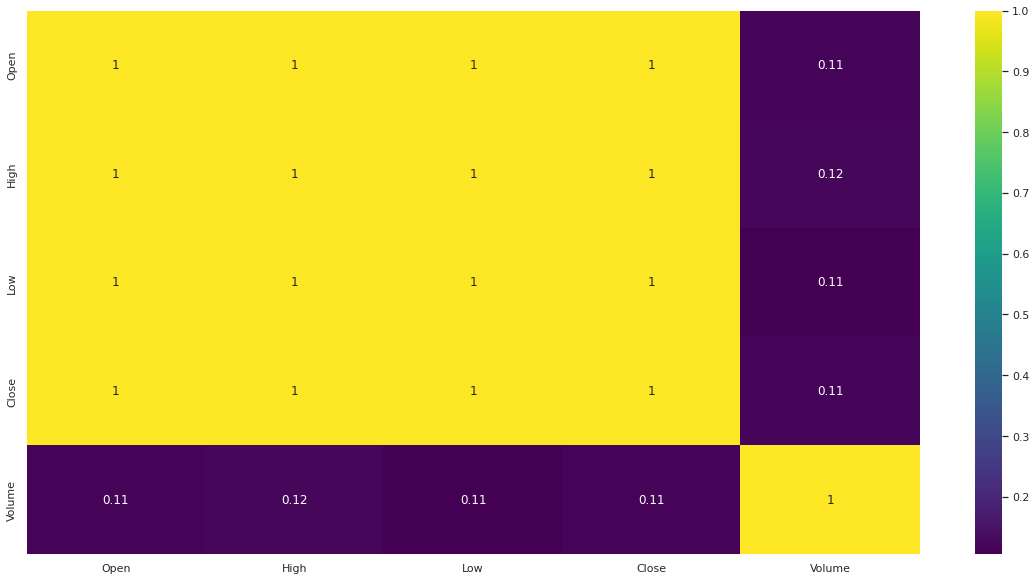

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [25]:
df = df.dropna()

In [26]:
X = df[['Low']]
y = df[['Close']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)

(5130, 1)
(5130, 1)


In [29]:
def train_linReg(features, labels):
    lin_reg = LinearRegression()
    lin_reg.fit(features, labels)
    return lin_reg

In [30]:
Total = df.isnull().sum().sort_values(ascending = False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Currency,0,0.0


In [31]:
lin_reg = train_linReg(X_train, y_train)

In [32]:
print(lin_reg.intercept_, lin_reg.coef_)

[-0.13799578] [[1.01238233]]


In [33]:
y_pred = lin_reg.predict(X_test)

In [34]:
lin_reg.score(X_test, y_test)

0.9985310413764027

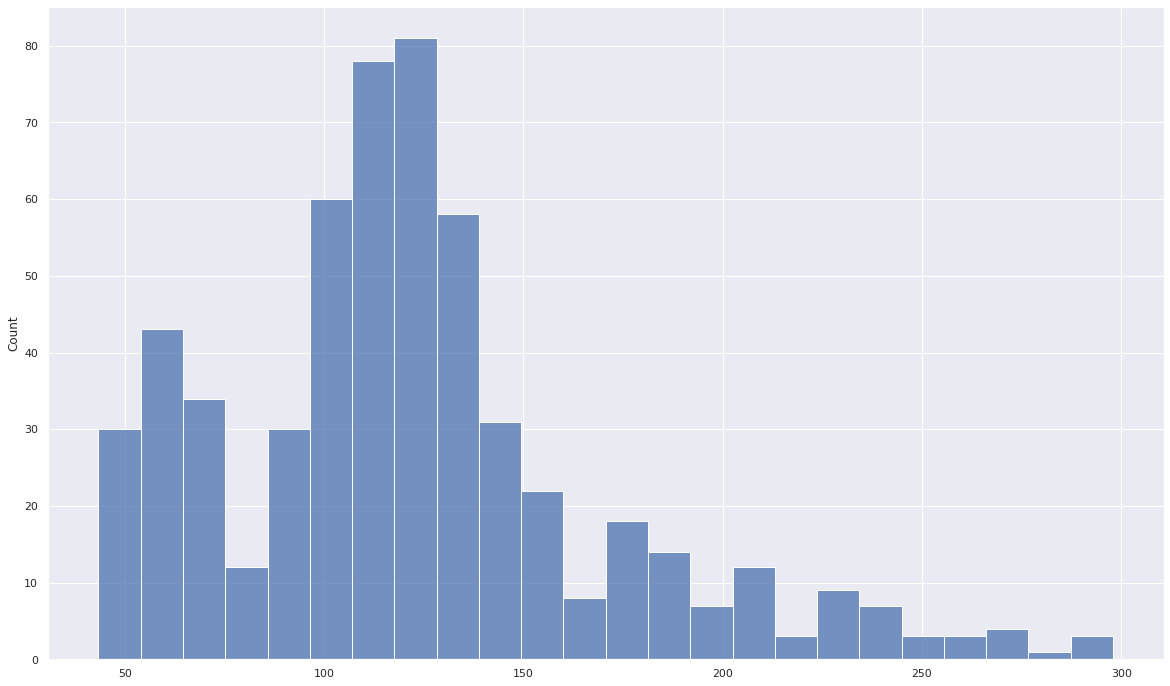

In [41]:
plt.figure(figsize=(20,12))
sns.histplot((y_pred))

**Model-2 Decision Tree Regressor**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [36]:
a=DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
   
    ('a',a)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9982611107599907
MAE 1.3091928241450028


**Model-3 Random Forest Regressor**

In [37]:
b = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('b',b)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


R2 score 0.9983723635071232
MAE 1.2985819309747404
